In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria/analise_dados_mod7_(1).xlsx')

In [ ]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
#Criado a lista que deseja retirar da pesquisa
lista_retirar = ['Indígena', 'Outra', 'Prefiro não informar']

In [ ]:
#Funçao isin usada para retirar alguns elementos da pesquisa
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

In [ ]:
dados['NAO_BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

In [ ]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [ ]:
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)')

In [ ]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
## Remove todos os espaços em branco da coluna 'NUMERO DE FUNCIONARIOS'
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace(' ', '')

In [ ]:
## Extrai apenas a primeira sequência de dígitos (números) da string na coluna 'NUMERO DE FUNCIONARIOS'
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

In [ ]:
## Conta quantas vezes cada valor aparece na coluna 'TEMPO_EXPERIENCIA', incluindo os valores ausentes (NaN)
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [ ]:
## Substitui os valores ausentes (NaN) por 0 na coluna 'TEMPO_EXPERIENCIA'
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
"O clima de trabalho/ambiente não é bom, Não tenho uma boa relação com meu líder/gestor, Gostaria de receber mais benefícios",1
Falta de organização nos processos internos,1
"Gostaria de receber mais benefícios, O clima de trabalho/ambiente não é bom, Falta de oportunidade de crescimento no emprego atual",1


In [ ]:
#Cria uma nova coluna chamada 'INSASTIFACAO' e preenche todas as linhas com o valor 0
dados['INSASTIFACAO'] = 0

In [ ]:
##Para todas as linhas onde a coluna 'Qual o principal motivo da sua insatisfação com a empresa atual?' NÃO está vazia (notnull),
# atualiza a coluna 'INSASTIFACAO' com:
# 1 se o motivo da insatisfação contiver a palavra 'Salário', caso contrário, mantém como 0
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'INSASTIFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

### O que acontece acima ☝
.notnull() → Filtra apenas as respostas preenchidas.

.apply(lambda x: 1 if 'Salário' in x else 0) → Verifica se o texto da resposta menciona "Salário" e marca com 1 se sim.

Isso vai sobrescrever os valores da coluna INSASTIFACAO apenas onde a pessoa respondeu o motivo da insatisfação.

In [ ]:
dados['INSASTIFACAO'].value_counts()

,count
INSASTIFACAO,
0,2453
1,279


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
# Converte os valores da coluna 'NIVEL DE ENSINO' de texto para números, conforme o nível de escolaridade:
# - 'Não tenho graduação formal' → 0
# - 'Estudante de Graduação' → 1
# - 'Graduação/Bacharelado' → 2
# - 'Pós-graduação' → 3
# - 'Mestrado' → 4
# - 'Doutorado ou Phd' → 5
# Qualquer outro valor inesperado recebe -1
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x=='Não tenho graduação formal' else
                               1 if x=='Estudante de Graduação' else
                               2 if x=='Graduação/Bacharelado' else
                               3 if x=='Pós-graduação' else
                               4 if x=='Mestrado' else
                               5 if x=='Doutorado ou Phd' else -1)

In [ ]:
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA','INSASTIFACAO', 'SETOR', 'REGIAO ONDE MORA',
      'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]


In [ ]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSASTIFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

In [ ]:
# Cria variáveis dummies (colunas binárias) para as categorias das colunas 'GENERO', 'SETOR', 'NOVO_NIVEL' e 'REGIAO ONDE MORA'.
# O parâmetro drop_first=True remove a primeira categoria de cada coluna para evitar a armadilha das variáveis dummy (multicolinearidade)
dados = pd.get_dummies(dados, columns=['GENERO', 'SETOR', 'NOVO_NIVEL', 'REGIAO ONDE MORA'], drop_first=True)

In [ ]:
# Separa a base de dados em variáveis independentes (X) e a variável alvo (y). Aqui, 'SALARIO' é a variável que se quer prever, então ela vai pra y.
X = dados.drop('SALARIO', axis=1) #X = todas as colunas, exceto 'SALARIO'
y = dados['SALARIO'] #y = apenas a coluna 'SALARIO'

In [ ]:
#Importa a função train_test_split, que divide os dados em conjunto de treino e conjunto de teste.
from sklearn.model_selection import train_test_split

In [ ]:
#O parâmetro test_size=0.2 significa que 20% dos dados serão usados para teste e 80% para treino.
# random_state=42 é usado para garantir que a divisão seja reprodutível (mesma divisão de dados sempre que o código for executado).
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Importa o StandardScaler, que será usado para padronizar os dados (fazer com que todas as variáveis tenham a mesma escala).
# Isso é importante para algoritmos de machine learning que são sensíveis à escala das variáveis, como KNN, regressão logística, etc.
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cria uma instância do StandardScaler
scaler = StandardScaler()
# Aplica a padronização aos dados de treino (X_train), ajustando o scaler e transformando os dados de acordo com a média e o desvio padrão.
# Esse processo assegura que as variáveis tenham média 0 e desvio padrão 1.
x_train_scaled = scaler.fit_transform(X_train)
# Aplica a mesma transformação aos dados de teste (X_test), usando os parâmetros de treino (média e desvio padrão) para garantir que a padronização seja consistente.
x_test_scaled = scaler.fit_transform(X_test)

## O que esta acontecendo acima : ☝

train_test_split → divide os dados em treino (80%) e teste (20%).

StandardScaler → padroniza as variáveis, ajustando para uma distribuição normal (média 0, desvio 1). Isso é importante para evitar que variáveis com grandes escalas dominem o modelo.

Usamos fit_transform() nos dados de treino para aprender a transformação, e transform() nos dados de teste para aplicar a mesma transformação.

In [ ]:
# Importando a classe LinearRegression da biblioteca sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# Criando uma instância do modelo de regressão linear
model = LinearRegression()

In [ ]:
# Treinando o modelo usando os dados de treinamento escalonados (x_train_scaled) e as respostas (y_train)
model.fit(x_train_scaled, y_train)

LinearRegression()

##Explicação acima: ☝

from sklearn.linear_model import LinearRegression: Essa linha importa a classe LinearRegression da biblioteca scikit-learn, que é usada para realizar regressão linear.

model = LinearRegression(): Aqui, uma instância do modelo de regressão linear é criada, ou seja, um objeto que representará o modelo a ser treinado.

model.fit(x_train_scaled, y_train): A função fit é utilizada para treinar o modelo. Ela ajusta os parâmetros do modelo (coeficientes da regressão) com base nos dados de entrada (x_train_scaled, que são as variáveis independentes) e nas respostas desejadas (y_train, que são as variáveis dependentes ou valores reais). Neste caso, x_train_scaled indica que os dados de entrada já foram escalonados (normalizados).

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

23335686.204015546

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

3288.8242183100674

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.5238800775616035

## Explicando ☝

➡️Nós importamos a função LinearRegression da biblioteca sklearn, criamos um objeto chamado model apartir dessa função. E então enviando os parâmetros de treino na função fit (assim: model.fit(X_train_scaled, y_train)) nós conseguimos treinar o modelo.

➡️Usando a função predict e enviando como parâmetro o conjunto de teste (X_test_scaled) a gente conseguiu fazer as predições desse conjunto.

➡️E então partimos para uma parte muito importante de qualquer modelo de machine learning que é a avaliação do modelo, para saber se está bom ou ruim (ou mais ou menos, ou médio, ou excelente, ou … enfim, vocês entenderam, certo?😂) Focamos em três métricas principais para avaliação de modelos de regressão:

MSE (Mean Squared Error), MAE (Mean Absolute Error) e R² (R-squared). Com os resultados nós concluímos que para um modelo real de produção nosso modelo não seria aceitável.

In [ ]:
# Importando a biblioteca matplotlib.pyplot e atribuindo o apelido 'plt'
import matplotlib.pyplot as plt

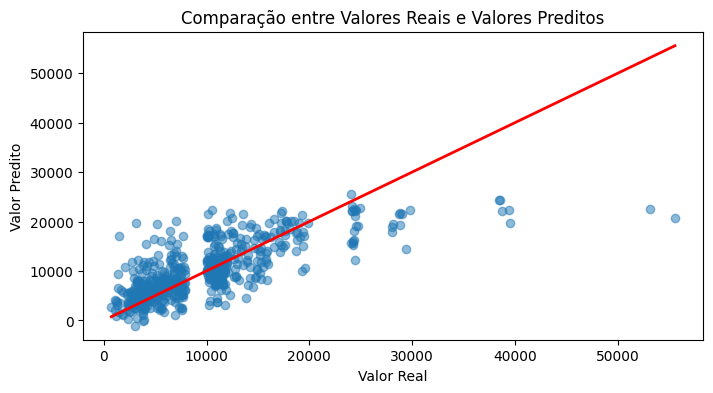

In [ ]:
# Criando uma figura com tamanho personalizado (8 de largura por 4 de altura)
plt.figure(figsize=(8,4))
# Criando um gráfico de dispersão (scatter plot) entre os valores reais (y_test) e os valores preditos (y_pred)
# O parâmetro alpha=0.5 deixa os pontos semi-transparentes
plt.scatter(y_test, y_pred, alpha=0.5)
# Definindo os rótulos
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Comparação entre Valores Reais e Valores Preditos')
# Desenhando uma linha vermelha que representa a "linha ideal" onde os valores preditos seriam iguais aos valores reais. Essa linha ajuda a visualizar o quão próximos os pontos estão da previsão perfeita
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color= 'red', linewidth=2)

In [ ]:
# Armazenando os nomes das colunas (atributos) do conjunto de dados X_train em uma variável
nomes_atributos = X_train.columns

In [ ]:
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSASTIFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [ ]:
# Criando um DataFrame com os coeficientes do modelo de regressão linear
# - model.coef_ contém os coeficientes aprendidos pelo modelo (um para cada atributo)
# - columns define o nome da coluna como 'coeficientes'
# - index usa os nomes das colunas do X_train, associando cada coeficiente ao seu respectivo atributo
coefs = pd.DataFrame(model.coef_,columns=['coeficientes'], index=nomes_atributos)

In [ ]:
# Ordenando o DataFrame pelos valores dos coeficientes em ordem decrescente. Isso ajuda a visualizar quais atributos têm mais impacto na predição do modelo
coefs = coefs.sort_values(by='coeficientes', ascending=False)

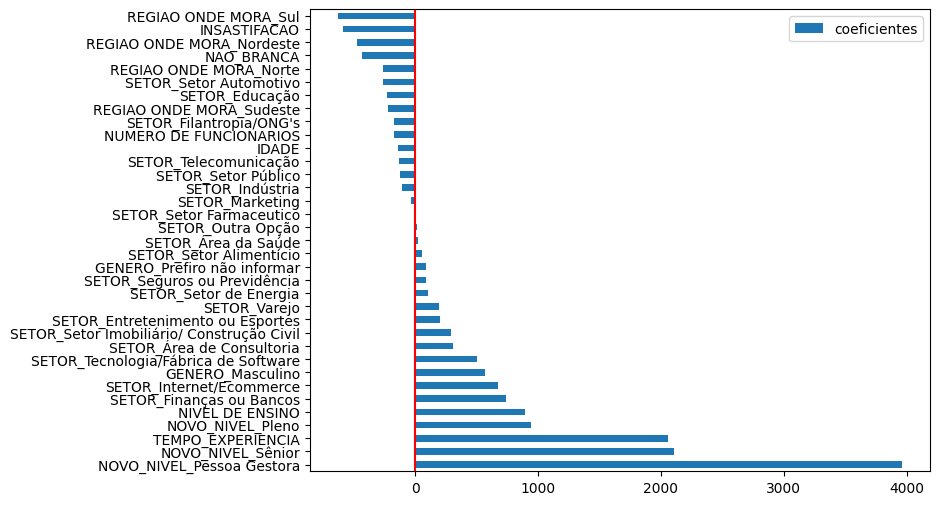

In [ ]:
# Criando um gráfico de barras horizontal para visualizar os coeficientes do modelo. Figsize define o tamanho da figura (8 de largura por 6 de altura)
coefs.plot.barh(figsize=(8,6))
# Adicionando uma linha vertical vermelha na posição x = 0
# Essa linha serve como referência visual para identificar se o coeficiente é positivo (à direita) ou negativo (à esquerda)
plt.axvline(x=0, color='red')

#E pra finalizar🤩

➡️Plotamos um gráfico dos valores reais versus os valores preditos pelo modelo e conseguimos perceber que até certo valor de salário, os valores preditos e os reais tem uma certa sintonia. Porém para valores muito altos de salários, as predições são muito distantes.

➡️Para conseguir analisar melhor o modelo, nós pegamos os coeficientes (pesos) de cada atributo, assim a gente conseguiu avaliar quais atributos tiveram mais peso positivo ou negativo para o resultado do modelo. Fizemos um gráfico bem bonito pra deixar mais visual essa questão dos coeficientes e conseguimos observar quais atributos pesaram mais para o negativo e quais pesaram mais para o positivo.

➡️Para finalizar, nós fizemos uma reflexão de que o modelo que nós treinamos foi utilizado para análise. Buscando entender no mundo real de hoje o que influencia o salário, olhamos os coeficientes e o que pesa para negativo e positivo.

💭Se um modelo para estimar o salário de uma pessoa, para ser usado na vida real, por exemplo, o salário da equipe da programaria vai ser estimado por um modelo, a gente teria que ter muito cuidado com ética para não reproduzir os vieses do mundo real.

